In [1]:
%run ../../bin/imports.ipynb
import pickle
from matplotlib import gridspec

## Plotting dPCR results

In [2]:
results_df_merged = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.dPCR_tissue_results.csv')

lod_df_merged = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.dPCR_cell_line_results.csv',
                        sep=',')


In [3]:
results_df_merged.head()

,Assay_Type,FAM_concentration,Patient,Round,Sample_Type,VIC_concentration
0,Kept\nAllele1,379.0,14.0,2,Normal,685.0
1,Kept\nAllele1,363.0,14.0,2,Normal,684.0
2,Kept\nAllele1,337.0,14.0,2,Normal,625.0
3,Kept\nAllele1,1098.0,14.0,2,Tumor,492.0
4,Kept\nAllele1,1063.0,14.0,2,Tumor,457.0


In [4]:
lod_df_merged.head()

,Sample,Purity,Replicate,Assay_Type,FAM_concentration,VIC_concentration
0,P40_R1,40,1,WT,362.0,551.0
1,P40_R1,40,1,WT,330.0,477.0
2,P40_R1,40,1,WT,333.0,503.0
3,P60_R1,60,1,WT,367.0,483.0
4,P60_R1,60,1,WT,358.0,466.0


In [5]:
cell_line_results_df = results_df_merged[results_df_merged.Patient == 21]
cell_line_results_df['Ratio_concentration'] = cell_line_results_df['FAM_concentration'] / (cell_line_results_df['VIC_concentration'] / 2)

results_df_merged = results_df_merged[results_df_merged.Patient != 21]
results_df_merged['Ratio_concentration'] = results_df_merged['FAM_concentration'] / (results_df_merged['VIC_concentration'] / 2)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
len(results_df_merged.Patient.sort_values().unique())

21

In [7]:
list(results_df_merged.Patient.sort_values().unique()[:3]) + list(results_df_merged.Patient.sort_values().unique()[4:9]) + list(results_df_merged.Patient.sort_values().unique()[10:11]) + list(results_df_merged.Patient.sort_values().unique()[9:10]) + list(results_df_merged.Patient.sort_values().unique()[3:4])  + list(results_df_merged.Patient.sort_values().unique()[11:])


[1.0,
 2.0,
 3.0,
 6.0,
 7.0,
 10.0,
 11.0,
 13.0,
 20.0,
 14.0,
 5.0,
 22.0,
 25.0,
 26.0,
 33.0,
 34.0,
 36.0,
 37.0,
 38.0,
 39.0,
 41.0]

In [8]:
patient_letter_map = pd.DataFrame({'Patient': list(results_df_merged.Patient.sort_values().unique()[:3]) 
                                   + list(results_df_merged.Patient.sort_values().unique()[4:9]) 
                                   + list(results_df_merged.Patient.sort_values().unique()[10:11]) 
                                   + list(results_df_merged.Patient.sort_values().unique()[9:10]) 
                                   + list(results_df_merged.Patient.sort_values().unique()[3:4])  
                                   + list(results_df_merged.Patient.sort_values().unique()[11:]),
                                 'Patient_ID': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                                               'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U']})

results_df_merged = pd.merge(results_df_merged, patient_letter_map, on='Patient', how='left')

In [9]:
patient_letter_map.head(25)

,Patient,Patient_ID
0,1.0,A
1,2.0,B
2,3.0,C
3,6.0,D
4,7.0,E
5,10.0,F
6,11.0,G
7,13.0,H
8,20.0,I
9,14.0,J


In [10]:
results_df_merged.head()

,Assay_Type,FAM_concentration,Patient,Round,Sample_Type,VIC_concentration,Ratio_concentration,Patient_ID
0,Kept\nAllele1,379.0,14.0,2,Normal,685.0,1.106569,J
1,Kept\nAllele1,363.0,14.0,2,Normal,684.0,1.061404,J
2,Kept\nAllele1,337.0,14.0,2,Normal,625.0,1.078400,J
3,Kept\nAllele1,1098.0,14.0,2,Tumor,492.0,4.463415,J
4,Kept\nAllele1,1063.0,14.0,2,Tumor,457.0,4.652079,J


In [11]:
# Split into positive results and negative results merged
negative_patients = list(results_df_merged[results_df_merged.Assay_Type == 'Kept\nAllele1'].Patient_ID.unique())
results_df_positive_merged = results_df_merged[~results_df_merged.Patient_ID.isin(negative_patients)]
results_df_negative_merged = results_df_merged[results_df_merged.Patient_ID.isin(negative_patients)]

#### LOD

In [12]:
lod_df_merged['Ratio_concentration'] = lod_df_merged['FAM_concentration'] / (lod_df_merged['VIC_concentration'] / 2)


In [13]:
lod_df_merged.head()

,Sample,Purity,Replicate,Assay_Type,FAM_concentration,VIC_concentration,Ratio_concentration
0,P40_R1,40,1,WT,362.0,551.0,1.313975
1,P40_R1,40,1,WT,330.0,477.0,1.383648
2,P40_R1,40,1,WT,333.0,503.0,1.324056
3,P60_R1,60,1,WT,367.0,483.0,1.519669
4,P60_R1,60,1,WT,358.0,466.0,1.536481


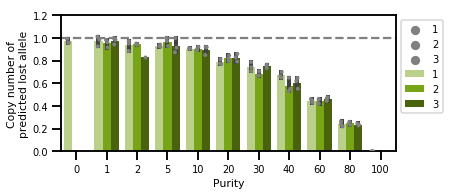

In [35]:
sns.set_context('talk', font_scale=0.6)
fig = plt.figure(figsize=(6, 2.5))
#fig.text(0, 0.48, 'C', fontsize=16)
#fig.text(0.53, 0.48, 'D', fontsize=16)

# rows, columns
sns.barplot(x='Purity', y='Ratio_concentration', hue='Replicate', 
           data=lod_df_merged[lod_df_merged.Assay_Type == 'MUT'], 
            #palette=['#5b5d5f', '#a5a6a9', '#d7d8d9'])
            palette=['#BFDD7F', '#81bc00', '#4D7000'])
sns.stripplot(x='Purity', y='Ratio_concentration', hue='Replicate', 
           data=lod_df_merged[lod_df_merged.Assay_Type == 'MUT'], 
              palette=['grey', 'grey', 'grey'], size=4, dodge=True)
plt.axhline(y=1, color='grey', linestyle='--')
#plt.ylabel('RNaseP Copies')
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Copy number of\npredicted lost allele')
plt.ylim(0, 1.2)
#plt.tight_layout()
plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/dPCR.LOD_lost_allele.pdf', bbox_inches='tight')

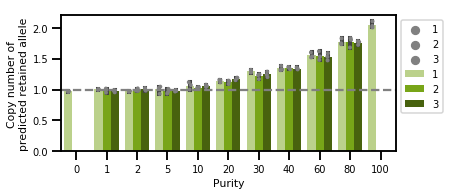

In [25]:
sns.set_context('talk', font_scale=0.6)
fig = plt.figure(figsize=(6, 2.5))
#fig.text(0, 0.48, 'C', fontsize=16)
#fig.text(0.53, 0.48, 'D', fontsize=16)

# rows, columns
sns.barplot(x='Purity', y='Ratio_concentration', hue='Replicate', 
           data=lod_df_merged[lod_df_merged.Assay_Type == 'WT'], 
            palette=['#BFDD7F', '#81bc00', '#4D7000'])
sns.stripplot(x='Purity', y='Ratio_concentration', hue='Replicate', 
           data=lod_df_merged[lod_df_merged.Assay_Type == 'WT'], 
            palette=['grey', 'grey', 'grey'], size=4, dodge=True)
plt.axhline(y=1, color='grey', linestyle='--')
#plt.ylabel('RNaseP Copies')
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Copy number of\npredicted retained allele')
plt.ylim(0, 2.2)
#plt.tight_layout()
plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/dPCR.LOD_kept_allele.pdf', bbox_inches='tight')

#### Plot sample data

Positive data

In [16]:
results_df_positive_merged.head()

,Assay_Type,FAM_concentration,Patient,Round,Sample_Type,VIC_concentration,Ratio_concentration,Patient_ID
36,Kept\nAllele,510.7,3.0,1,Normal,363.0,2.813774,C
37,Kept\nAllele,465.5,3.0,1,Normal,352.5,2.641135,C
38,Kept\nAllele,480.5,3.0,1,Tumor,434.8,2.210212,C
39,Kept\nAllele,492.2,3.0,1,Tumor,421.7,2.334361,C
40,Lost\nAllele,222.6,3.0,1,Normal,383.8,1.159979,C


Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


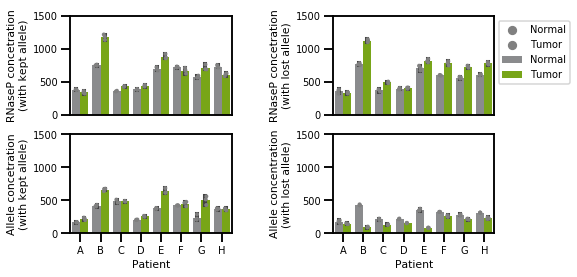

In [26]:
sns.set_context('talk', font_scale=0.6)
fig = plt.figure(figsize=(7.6, 4))
#fig.text(0, 0.48, 'C', fontsize=16)
#fig.text(0.53, 0.48, 'D', fontsize=16)

total_columns, total_rows = 26, 2

# rows, columns
ax1 = plt.subplot2grid((total_rows, total_columns), (0, 0), colspan=10)
sns.barplot(x='Patient_ID', y='VIC_concentration', hue='Sample_Type', 
            data=results_df_positive_merged[results_df_positive_merged.Assay_Type == 'Kept\nAllele'],
           order=results_df_positive_merged.Patient_ID.sort_values().unique(),
           palette=['#898b8e', '#81bc00'])
sns.stripplot(x='Patient_ID', y='VIC_concentration', hue='Sample_Type', 
            data=results_df_positive_merged[results_df_positive_merged.Assay_Type == 'Kept\nAllele'],
           order=results_df_positive_merged.Patient_ID.sort_values().unique(),
           palette=['grey', 'grey'], size=4, dodge=True)
plt.ylim(0, 1500)
plt.legend().remove()
plt.ylabel('RNaseP concetration\n(with kept allele)')
plt.xticks([])
plt.xlabel('')
#plt.title('Kept Allele Control')
plt.tight_layout()

ax2 = plt.subplot2grid((total_rows, total_columns), (0, 16), colspan=10)
sns.barplot(x='Patient_ID', y='VIC_concentration', hue='Sample_Type', 
            data=results_df_positive_merged[results_df_positive_merged.Assay_Type == 'Lost\nAllele'],
           order=results_df_positive_merged.Patient_ID.sort_values().unique(),
            palette=['#898b8e', '#81bc00'])
sns.stripplot(x='Patient_ID', y='VIC_concentration', hue='Sample_Type', 
            data=results_df_positive_merged[results_df_positive_merged.Assay_Type == 'Lost\nAllele'],
           order=results_df_positive_merged.Patient_ID.sort_values().unique(),
            palette=['grey', 'grey'], size=4, dodge=True)
#plt.ylabel('RNaseP Copies')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.xticks([])
plt.xlabel('')
plt.ylabel('RNaseP concetration\n(with lost allele)')
plt.ylim(0, 1500)
plt.tight_layout()

#### Alleles ####

ax1 = plt.subplot2grid((total_rows, total_columns), (1, 0), colspan=10)
sns.barplot(x='Patient_ID', y='FAM_concentration', hue='Sample_Type', 
            data=results_df_positive_merged[results_df_positive_merged.Assay_Type == 'Kept\nAllele'],
           order=results_df_positive_merged.Patient_ID.sort_values().unique(),
           palette=['#898b8e', '#81bc00'])
sns.stripplot(x='Patient_ID', y='FAM_concentration', hue='Sample_Type', 
            data=results_df_positive_merged[results_df_positive_merged.Assay_Type == 'Kept\nAllele'],
           order=results_df_positive_merged.Patient_ID.sort_values().unique(),
           palette=['grey', 'grey'], size=4, dodge=True)
plt.ylim(0, 1500)
plt.legend().remove()
plt.xlabel('Patient')
plt.ylabel('Allele concetration\n(with kept allele)')
#plt.title('Kept Allele Control')
plt.tight_layout()

ax2 = plt.subplot2grid((total_rows, total_columns), (1, 16), colspan=10)
sns.barplot(x='Patient_ID', y='FAM_concentration', hue='Sample_Type', 
            data=results_df_positive_merged[results_df_positive_merged.Assay_Type == 'Lost\nAllele'],
            order=results_df_positive_merged.Patient_ID.sort_values().unique(),
            palette=['#898b8e', '#81bc00'])
sns.stripplot(x='Patient_ID', y='FAM_concentration', hue='Sample_Type', 
            data=results_df_positive_merged[results_df_positive_merged.Assay_Type == 'Lost\nAllele'],
            order=results_df_positive_merged.Patient_ID.sort_values().unique(),
            palette=['grey', 'grey'], size=4, dodge=True)
plt.legend(bbox_to_anchor=(1.5, 1))
plt.ylabel('Allele concentration\n(with lost allele)')
plt.xlabel('Patient')
plt.legend().remove()
plt.ylim(0, 1500)
plt.tight_layout()

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/dPCR.raw_positive_data.pdf', bbox_inches='tight')

In [18]:
results_df_negative_merged.head()

,Assay_Type,FAM_concentration,Patient,Round,Sample_Type,VIC_concentration,Ratio_concentration,Patient_ID
0,Kept\nAllele1,379.0,14.0,2,Normal,685.0,1.106569,J
1,Kept\nAllele1,363.0,14.0,2,Normal,684.0,1.061404,J
2,Kept\nAllele1,337.0,14.0,2,Normal,625.0,1.078400,J
3,Kept\nAllele1,1098.0,14.0,2,Tumor,492.0,4.463415,J
4,Kept\nAllele1,1063.0,14.0,2,Tumor,457.0,4.652079,J


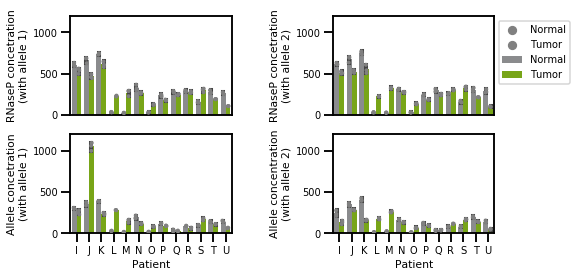

In [27]:
sns.set_context('talk', font_scale=0.6)
fig = plt.figure(figsize=(7.6, 4))
#fig.text(0, 0.48, 'C', fontsize=16)
#fig.text(0.53, 0.48, 'D', fontsize=16)

total_columns, total_rows = 26, 2

# rows, columns
ax1 = plt.subplot2grid((total_rows, total_columns), (0, 0), colspan=10)
sns.barplot(x='Patient_ID', y='VIC_concentration', hue='Sample_Type', 
            data=results_df_negative_merged[results_df_negative_merged.Assay_Type == 'Kept\nAllele1'],
           order=results_df_negative_merged.Patient_ID.sort_values().unique(),
           palette=['#898b8e', '#81bc00'])
sns.stripplot(x='Patient_ID', y='VIC_concentration', hue='Sample_Type', 
            data=results_df_negative_merged[results_df_negative_merged.Assay_Type == 'Kept\nAllele1'],
           order=results_df_negative_merged.Patient_ID.sort_values().unique(),
           palette=['grey', 'grey'], size=4, dodge=True)
plt.ylim(0, 1200)
plt.legend().remove()
plt.ylabel('RNaseP concetration\n(with allele 1)')
plt.xticks([])
plt.xlabel('')
#plt.title('Kept Allele Control')
plt.tight_layout()

ax2 = plt.subplot2grid((total_rows, total_columns), (0, 16), colspan=10)
sns.barplot(x='Patient_ID', y='VIC_concentration', hue='Sample_Type', 
            data=results_df_negative_merged[results_df_negative_merged.Assay_Type == 'Kept\nAllele2'],
           order=results_df_negative_merged.Patient_ID.sort_values().unique(),
            palette=['#898b8e', '#81bc00'])
sns.stripplot(x='Patient_ID', y='VIC_concentration', hue='Sample_Type', 
            data=results_df_negative_merged[results_df_negative_merged.Assay_Type == 'Kept\nAllele2'],
           order=results_df_negative_merged.Patient_ID.sort_values().unique(),
            palette=['grey', 'grey'], size=4, dodge=True)
#plt.ylabel('RNaseP Copies')
plt.legend(bbox_to_anchor=(1.5, 1))
plt.xticks([])
plt.xlabel('')
plt.ylabel('RNaseP concetration\n(with allele 2)')
plt.ylim(0, 1200)
plt.tight_layout()

#### Alleles ####

ax1 = plt.subplot2grid((total_rows, total_columns), (1, 0), colspan=10)
sns.barplot(x='Patient_ID', y='FAM_concentration', hue='Sample_Type', 
            data=results_df_negative_merged[results_df_negative_merged.Assay_Type == 'Kept\nAllele1'],
           order=results_df_negative_merged.Patient_ID.sort_values().unique(),
           palette=['#898b8e', '#81bc00'])
sns.stripplot(x='Patient_ID', y='FAM_concentration', hue='Sample_Type', 
            data=results_df_negative_merged[results_df_negative_merged.Assay_Type == 'Kept\nAllele1'],
           order=results_df_negative_merged.Patient_ID.sort_values().unique(),
           palette=['grey', 'grey'], size=4, dodge=True)
plt.ylim(0, 1200)
plt.legend().remove()
plt.xlabel('Patient')
plt.ylabel('Allele concetration\n(with allele 1)')
#plt.title('Kept Allele Control')
plt.tight_layout()

ax2 = plt.subplot2grid((total_rows, total_columns), (1, 16), colspan=10)
sns.barplot(x='Patient_ID', y='FAM_concentration', hue='Sample_Type', 
            data=results_df_negative_merged[results_df_negative_merged.Assay_Type == 'Kept\nAllele2'],
            order=results_df_negative_merged.Patient_ID.sort_values().unique(),
            palette=['#898b8e', '#81bc00'])
sns.stripplot(x='Patient_ID', y='FAM_concentration', hue='Sample_Type', 
            data=results_df_negative_merged[results_df_negative_merged.Assay_Type == 'Kept\nAllele2'],
            order=results_df_negative_merged.Patient_ID.sort_values().unique(),
            palette=['grey', 'grey'], size=4, dodge=True)
plt.legend(bbox_to_anchor=(1.5, 1))
plt.ylabel('Allele concentration\n(with allele 2)')
plt.xlabel('Patient')
plt.legend().remove()
plt.ylim(0, 1200)
plt.tight_layout()

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/dPCR.raw_negative_data.pdf', bbox_inches='tight')

Tumor samples for confirming HLA LOH

In [20]:
results_df_positive_merged.head()

,Assay_Type,FAM_concentration,Patient,Round,Sample_Type,VIC_concentration,Ratio_concentration,Patient_ID
36,Kept\nAllele,510.7,3.0,1,Normal,363.0,2.813774,C
37,Kept\nAllele,465.5,3.0,1,Normal,352.5,2.641135,C
38,Kept\nAllele,480.5,3.0,1,Tumor,434.8,2.210212,C
39,Kept\nAllele,492.2,3.0,1,Tumor,421.7,2.334361,C
40,Lost\nAllele,222.6,3.0,1,Normal,383.8,1.159979,C


Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


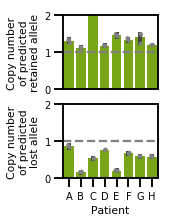

In [28]:
sns.set_context('talk', font_scale=0.6)
fig = plt.figure(figsize=(1.7, 3))

total_columns, total_rows = 12, 2


# rows, columns

ax1 = plt.subplot2grid((total_rows, total_columns), (0, 0), colspan=12)
sns.barplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_positive_merged[(results_df_positive_merged.Sample_Type == 'Tumor')&
                                  (results_df_positive_merged.Assay_Type == 'Kept\nAllele')],
           order=results_df_positive_merged.Patient_ID.sort_values().unique(),
           palette=['#81bc00'])
sns.stripplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_positive_merged[(results_df_positive_merged.Sample_Type == 'Tumor')&
                                  (results_df_positive_merged.Assay_Type == 'Kept\nAllele')],
           order=results_df_positive_merged.Patient_ID.sort_values().unique(),
           palette=['grey'], size=4)
plt.axhline(y=1, color='grey', linestyle='--')
plt.ylim(0, 2)
plt.legend().remove()
plt.xticks([])
plt.ylabel('Copy number\nof predicted\nretained allele')
plt.xlabel('')
plt.tight_layout()

ax2 = plt.subplot2grid((total_rows, total_columns), (1, 0), colspan=12)
sns.barplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_positive_merged[(results_df_positive_merged.Sample_Type == 'Tumor')&
                                  (results_df_positive_merged.Assay_Type == 'Lost\nAllele')],
           order=results_df_positive_merged.Patient_ID.sort_values().unique(),
           palette=['#81bc00'])
sns.stripplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_positive_merged[(results_df_positive_merged.Sample_Type == 'Tumor')&
                                  (results_df_positive_merged.Assay_Type == 'Lost\nAllele')],
           order=results_df_positive_merged.Patient_ID.sort_values().unique(),
           palette=['grey'], size=4)
plt.axhline(y=1, color='grey', linestyle='--')
plt.ylabel('Copy number\nof predicted\nlost allele')
plt.xlabel('Patient')
plt.legend().remove()
#plt.legend(bbox_to_anchor=(1.25, 1))
plt.ylim(0, 2)
plt.tight_layout()

# Adding Significance astricks
#  Width: left = 0; Height: top = 1
#fig.text(0.152, 0.65, '*', fontsize=16)  # GBM
#fig.text(0.565, 0.86, '*', fontsize=16)  # SKCM

#fig.text(0.96, 0.89, '*', fontsize=16)  # C>T
#fig.text(0.42, 0.42, '*', fontsize=16)  # 07a
#fig.text(0.46, 0.435, '*', fontsize=16)  # 07b

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/dPCR.positive_allele_ratios.patients.pdf', bbox_inches='tight')


Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


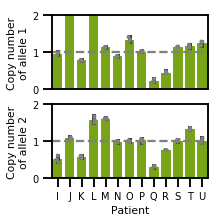

In [29]:
sns.set_context('talk', font_scale=0.6)
fig = plt.figure(figsize=(2.8, 3))

total_columns, total_rows = 12, 2


# rows, columns

ax1 = plt.subplot2grid((total_rows, total_columns), (0, 0), colspan=12)
sns.barplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_negative_merged[(results_df_negative_merged.Sample_Type == 'Tumor')&
                                  (results_df_negative_merged.Assay_Type == 'Kept\nAllele1')],
           order=results_df_negative_merged.Patient_ID.sort_values().unique(),
           palette=['#81bc00'])
sns.stripplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_negative_merged[(results_df_negative_merged.Sample_Type == 'Tumor')&
                                  (results_df_negative_merged.Assay_Type == 'Kept\nAllele1')],
           order=results_df_negative_merged.Patient_ID.sort_values().unique(),
           palette=['grey'], size=4)
plt.axhline(y=1, color='grey', linestyle='--')
plt.ylim(0, 2)
plt.legend().remove()
plt.xticks([])
plt.ylabel('Copy number\nof allele 1')
plt.xlabel('')
plt.tight_layout()

ax2 = plt.subplot2grid((total_rows, total_columns), (1, 0), colspan=12)
sns.barplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_negative_merged[(results_df_negative_merged.Sample_Type == 'Tumor')&
                                  (results_df_negative_merged.Assay_Type == 'Kept\nAllele2')],
           order=results_df_negative_merged.Patient_ID.sort_values().unique(),
           palette=['#81bc00'])
sns.stripplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_negative_merged[(results_df_negative_merged.Sample_Type == 'Tumor')&
                                  (results_df_negative_merged.Assay_Type == 'Kept\nAllele2')],
           order=results_df_negative_merged.Patient_ID.sort_values().unique(),
           palette=['grey'], size=4)
plt.axhline(y=1, color='grey', linestyle='--')
plt.ylabel('Copy number\nof allele 2')
plt.xlabel('Patient')
plt.legend().remove()
#plt.legend(bbox_to_anchor=(1.25, 1))
plt.ylim(0, 2)
plt.tight_layout()

# Adding Significance astricks
#  Width: left = 0; Height: top = 1
#fig.text(0.152, 0.65, '*', fontsize=16)  # GBM
#fig.text(0.565, 0.86, '*', fontsize=16)  # SKCM

#fig.text(0.96, 0.89, '*', fontsize=16)  # C>T
#fig.text(0.42, 0.42, '*', fontsize=16)  # 07a
#fig.text(0.46, 0.435, '*', fontsize=16)  # 07b

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/dPCR.negative_allele_ratios.patients.pdf', bbox_inches='tight')


Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


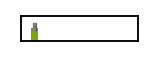

In [30]:
sns.set_context('talk', font_scale=0.6)
fig = plt.figure(figsize=(2.8, 1))
#fig.text(0, 0.48, 'C', fontsize=16)
#fig.text(0.53, 0.48, 'D', fontsize=16)

total_columns, total_rows = 16, 2


# rows, columns

ax1 = plt.subplot2grid((total_rows, total_columns), (0, 3), colspan=12)
sns.barplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_negative_merged[(results_df_negative_merged.Sample_Type == 'Tumor')&
                                   (results_df_negative_merged.Assay_Type == 'Kept\nAllele1')],
           order=results_df_negative_merged.Patient_ID.sort_values().unique(),
           palette=['#81bc00'])
sns.stripplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_negative_merged[(results_df_negative_merged.Sample_Type == 'Tumor')&
                                   (results_df_negative_merged.Assay_Type == 'Kept\nAllele1')],
           order=results_df_negative_merged.Patient_ID.sort_values().unique(),
           palette=['grey'], size=4)
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.ylim(4, 5)
plt.legend().remove()
plt.xticks([])
plt.yticks([])
plt.ylabel(' ')
plt.xlabel('')
plt.tight_layout()

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/dPCR.negative_allele_ratios.patients.extension.pdf', bbox_inches='tight')

Normal samples for primer design check

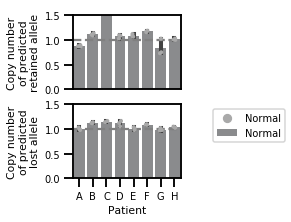

In [34]:
sns.set_context('talk', font_scale=0.6)
fig = plt.figure(figsize=(2.4, 3))
#fig.text(0, 0.48, 'C', fontsize=16)
#fig.text(0.53, 0.48, 'D', fontsize=16)

total_columns, total_rows = 16, 2


# rows, columns
ax1 = plt.subplot2grid((total_rows, total_columns), (0, 3), colspan=13)
sns.barplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_positive_merged[(results_df_positive_merged.Sample_Type == 'Normal')&
                                  (results_df_positive_merged.Assay_Type == 'Kept\nAllele')],
           order=results_df_positive_merged.Patient_ID.sort_values().unique(),
           palette=['#898b8e', '#81bc00'])
sns.stripplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_positive_merged[(results_df_positive_merged.Sample_Type == 'Normal')&
                                  (results_df_positive_merged.Assay_Type == 'Kept\nAllele')],
           order=results_df_positive_merged.Patient_ID.sort_values().unique(),
           palette=['darkgrey'], size=4)
plt.axhline(y=1, color='grey', linestyle='--')
plt.ylim(0, 1.5)
plt.legend().remove()
plt.xticks([])
plt.ylabel('Copy number\nof predicted\nretained allele')
plt.xlabel('')
plt.tight_layout()


ax2 = plt.subplot2grid((total_rows, total_columns), (1, 3), colspan=13)
sns.barplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_positive_merged[(results_df_positive_merged.Sample_Type == 'Normal')&
                                  (results_df_positive_merged.Assay_Type == 'Lost\nAllele')],
           order=results_df_positive_merged.Patient_ID.sort_values().unique(),
           palette=['#898b8e', '#81bc00'])
sns.stripplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_positive_merged[(results_df_positive_merged.Sample_Type == 'Normal')&
                                  (results_df_positive_merged.Assay_Type == 'Lost\nAllele')],
           order=results_df_positive_merged.Patient_ID.sort_values().unique(),
           palette=['darkgrey'], size=4)
plt.axhline(y=1, color='grey', linestyle='--')
plt.ylabel('Copy number\nof predicted\nlost allele')
plt.xlabel('Patient')
plt.legend(bbox_to_anchor=(1.25, 1))
plt.ylim(0, 1.5)
plt.tight_layout()

# Adding Significance astricks
#  Width: left = 0; Height: top = 1
#fig.text(0.152, 0.65, '*', fontsize=16)  # GBM
#fig.text(0.565, 0.86, '*', fontsize=16)  # SKCM

#fig.text(0.96, 0.89, '*', fontsize=16)  # C>T
#fig.text(0.42, 0.42, '*', fontsize=16)  # 07a
#fig.text(0.46, 0.435, '*', fontsize=16)  # 07b

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/dPCR.positive_allele_ratios.cellline_patients.normal_only.pdf', bbox_inches='tight')

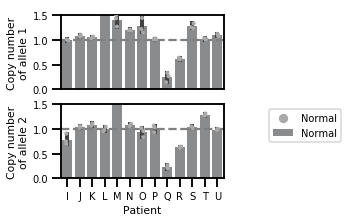

In [33]:
sns.set_context('talk', font_scale=0.6)
fig = plt.figure(figsize=(3.6, 3))
#fig.text(0, 0.48, 'C', fontsize=16)
#fig.text(0.53, 0.48, 'D', fontsize=16)

total_columns, total_rows = 16, 2


# rows, columns
ax1 = plt.subplot2grid((total_rows, total_columns), (0, 3), colspan=13)
sns.barplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_negative_merged[(results_df_negative_merged.Sample_Type == 'Normal')&
                                  (results_df_negative_merged.Assay_Type == 'Kept\nAllele1')],
           order=results_df_negative_merged.Patient_ID.sort_values().unique(),
           palette=['#898b8e', '#81bc00'])
sns.stripplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_negative_merged[(results_df_negative_merged.Sample_Type == 'Normal')&
                                  (results_df_negative_merged.Assay_Type == 'Kept\nAllele1')],
           order=results_df_negative_merged.Patient_ID.sort_values().unique(),
           palette=['darkgrey'], size=4)
plt.axhline(y=1, color='grey', linestyle='--')
plt.ylim(0, 1.5)
plt.legend().remove()
plt.xticks([])
plt.ylabel('Copy number\nof allele 1')
plt.xlabel('')
plt.tight_layout()


ax2 = plt.subplot2grid((total_rows, total_columns), (1, 3), colspan=13)
sns.barplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_negative_merged[(results_df_negative_merged.Sample_Type == 'Normal')&
                                  (results_df_negative_merged.Assay_Type == 'Kept\nAllele2')],
           order=results_df_negative_merged.Patient_ID.sort_values().unique(),
           palette=['#898b8e', '#81bc00'])
sns.stripplot(x='Patient_ID', y='Ratio_concentration', hue='Sample_Type',
           data=results_df_negative_merged[(results_df_negative_merged.Sample_Type == 'Normal')&
                                  (results_df_negative_merged.Assay_Type == 'Kept\nAllele2')],
           order=results_df_negative_merged.Patient_ID.sort_values().unique(),
           palette=['darkgrey'], size=4)
plt.axhline(y=1, color='grey', linestyle='--')
plt.ylabel('Copy number\nof allele 2')
plt.xlabel('Patient')
plt.legend(bbox_to_anchor=(1.25, 1))
plt.ylim(0, 1.5)
plt.tight_layout()

# Adding Significance astricks
#  Width: left = 0; Height: top = 1
#fig.text(0.152, 0.65, '*', fontsize=16)  # GBM
#fig.text(0.565, 0.86, '*', fontsize=16)  # SKCM

#fig.text(0.96, 0.89, '*', fontsize=16)  # C>T
#fig.text(0.42, 0.42, '*', fontsize=16)  # 07a
#fig.text(0.46, 0.435, '*', fontsize=16)  # 07b

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/dPCR.negative_allele_ratios.cellline_patients.normal_only.pdf', bbox_inches='tight')

P-values

In [26]:
# Kept alleles (one-tailed)
all_p_values, all_effect_sizes = [], []
for patient in results_df_positive_merged.Patient_ID.sort_values().unique():
    print('Patient:', patient, ' P-value:', round(sp.ttest_rel(results_df_positive_merged[(results_df_positive_merged.Assay_Type == 'Kept\nAllele')&(results_df_positive_merged.Patient_ID == patient)&(results_df_positive_merged.Sample_Type == 'Normal')]['Ratio_concentration'],
                   results_df_positive_merged[(results_df_positive_merged.Assay_Type == 'Kept\nAllele')&(results_df_positive_merged.Patient_ID == patient)&(results_df_positive_merged.Sample_Type == 'Tumor')]['Ratio_concentration'])[1], 4)/2)
    #print(list(results_df_merged[(results_df_merged.Assay_Type == 'Lost\nAllele')&(results_df_merged.Patient == patient)&(results_df_merged.Sample_Type == 'Normal')]['Ratio_copies']),
    #     list(results_df_merged[(results_df_merged.Assay_Type == 'Lost\nAllele')&(results_df_merged.Patient == patient)&(results_df_merged.Sample_Type == 'Tumor')]['Ratio_copies']))

Patient: A  P-value: 0.0014
Patient: B  P-value: 0.28465
Patient: C  P-value: 0.1003
Patient: D  P-value: 0.02915
Patient: E  P-value: 0.0001
Patient: F  P-value: 0.01045
Patient: G  P-value: 0.04255
Patient: H  P-value: 0.0005


In [27]:
# Lost alleles (one-tailed)
all_p_values, all_effect_sizes = [], []
for patient in results_df_positive_merged.Patient_ID.sort_values().unique():
    print('Patient:', patient, ' P-value:', round(sp.ttest_rel(results_df_positive_merged[(results_df_positive_merged.Assay_Type == 'Lost\nAllele')&(results_df_positive_merged.Patient_ID == patient)&(results_df_positive_merged.Sample_Type == 'Normal')]['Ratio_concentration'],
                   results_df_positive_merged[(results_df_positive_merged.Assay_Type == 'Lost\nAllele')&(results_df_positive_merged.Patient_ID == patient)&(results_df_positive_merged.Sample_Type == 'Tumor')]['Ratio_concentration'])[1]/2, 4))
    #print(list(results_df_merged[(results_df_merged.Assay_Type == 'Lost\nAllele')&(results_df_merged.Patient == patient)&(results_df_merged.Sample_Type == 'Normal')]['Ratio_copies']),
    #     list(results_df_merged[(results_df_merged.Assay_Type == 'Lost\nAllele')&(results_df_merged.Patient == patient)&(results_df_merged.Sample_Type == 'Tumor')]['Ratio_copies']))

Patient: A  P-value: 0.0339
Patient: B  P-value: 0.0
Patient: C  P-value: 0.0097
Patient: D  P-value: 0.0034
Patient: E  P-value: 0.0003
Patient: F  P-value: 0.0001
Patient: G  P-value: 0.0004
Patient: H  P-value: 0.0001


In [28]:
results_df_negative_merged.Patient_ID.unique()

array(['J', 'K', 'I', 'M', 'S', 'U', 'L', 'O', 'N', 'P', 'T', 'Q', 'R'],
      dtype=object)

In [29]:
# Allele 1's (one-tailed) - negative
all_p_values, all_effect_sizes = [], []
for patient in results_df_negative_merged.Patient_ID.sort_values().unique():    
    print('Patient:', patient, ' P-value:', round(sp.ttest_rel(results_df_negative_merged[(results_df_negative_merged.Assay_Type == 'Kept\nAllele1')&(results_df_negative_merged.Patient_ID == patient)&(results_df_negative_merged.Sample_Type == 'Normal')]['Ratio_concentration'],
                   results_df_negative_merged[(results_df_negative_merged.Assay_Type == 'Kept\nAllele1')&(results_df_negative_merged.Patient_ID == patient)&(results_df_negative_merged.Sample_Type == 'Tumor')]['Ratio_concentration'])[1], 4)/2)
    #print(list(results_df_merged[(results_df_merged.Assay_Type == 'Lost\nAllele')&(results_df_merged.Patient == patient)&(results_df_merged.Sample_Type == 'Normal')]['Ratio_copies']),
    #     list(results_df_merged[(results_df_merged.Assay_Type == 'Lost\nAllele')&(results_df_merged.Patient == patient)&(results_df_merged.Sample_Type == 'Tumor')]['Ratio_copies']))

Patient: I  P-value: 0.05605
Patient: J  P-value: 0.0002
Patient: K  P-value: 0.00055
Patient: L  P-value: 0.013
Patient: M  P-value: 0.02305
Patient: N  P-value: 0.0007
Patient: O  P-value: 0.2632
Patient: P  P-value: 0.27765
Patient: Q  P-value: 0.3348
Patient: R  P-value: 0.0023
Patient: S  P-value: 0.0318
Patient: T  P-value: 0.0059
Patient: U  P-value: 0.0285


In [30]:
# Allele 2's (one-tailed) - negative
all_p_values, all_effect_sizes = [], []
for patient in results_df_negative_merged.Patient_ID.sort_values().unique():
    print('Patient:', patient, ' P-value:', round(sp.ttest_rel(results_df_negative_merged[(results_df_negative_merged.Assay_Type == 'Kept\nAllele2')&(results_df_negative_merged.Patient_ID == patient)&(results_df_negative_merged.Sample_Type == 'Normal')]['Ratio_concentration'],
                   results_df_negative_merged[(results_df_negative_merged.Assay_Type == 'Kept\nAllele2')&(results_df_negative_merged.Patient_ID == patient)&(results_df_negative_merged.Sample_Type == 'Tumor')]['Ratio_concentration'])[1]/2, 4))
    #print(list(results_df_merged[(results_df_merged.Assay_Type == 'Lost\nAllele')&(results_df_merged.Patient == patient)&(results_df_merged.Sample_Type == 'Normal')]['Ratio_copies']),
    #     list(results_df_merged[(results_df_merged.Assay_Type == 'Lost\nAllele')&(results_df_merged.Patient == patient)&(results_df_merged.Sample_Type == 'Tumor')]['Ratio_copies']))

Patient: I  P-value: 0.0628
Patient: J  P-value: 0.0318
Patient: K  P-value: 0.0004
Patient: L  P-value: 0.0039
Patient: M  P-value: 0.0068
Patient: N  P-value: 0.0287
Patient: O  P-value: 0.1635
Patient: P  P-value: 0.4264
Patient: Q  P-value: 0.0115
Patient: R  P-value: 0.0015
Patient: S  P-value: 0.3428
Patient: T  P-value: 0.0159
Patient: U  P-value: 0.2093


46 46



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


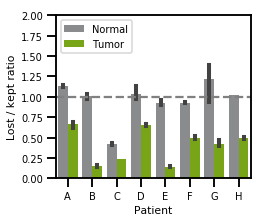

In [31]:
# Get lost/kept for normal and tumor samples - positive

results_df_merged_kept = results_df_positive_merged[results_df_positive_merged.Assay_Type == 'Kept\nAllele']
results_df_merged_lost = results_df_positive_merged[results_df_positive_merged.Assay_Type == 'Lost\nAllele']

print(len(results_df_merged_kept), len(results_df_merged_lost))

results_df_merged_lost['Lost / Kept Ratio'] = list(pd.Series(list(results_df_merged_lost['Ratio_concentration'])) 
                                                       / pd.Series(list(results_df_merged_kept['Ratio_concentration'])))
allele_ratio_df = results_df_merged_lost.copy()

sns.set_context('talk', font_scale=0.6)
fig = plt.figure(figsize=(3.5, 3))

sns.barplot(x='Patient_ID', y='Lost / Kept Ratio', hue='Sample_Type', data=allele_ratio_df,
           order=results_df_positive_merged.Patient_ID.sort_values().unique(),
           palette=['#898b8e', '#81bc00'])
plt.axhline(y=1, color='grey', linestyle='--')
#sns.swarmplot(x='Patient', y='Tumor / Normal Ratio', hue='Assay_Type', data=ratio_df, color='grey', size=8)
#plt.ylim(0, 1)
plt.ylabel('Lost / kept ratio')
plt.xlabel('Patient')
plt.legend(loc=2)
plt.ylim(0, 2)

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/dPCR.positive_lost_kept_ratio.pdf', bbox_inches='tight')

78 78



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


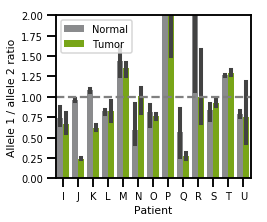

In [32]:
# Get lost/kept for normal and tumor samples - negative

results_df_merged_kept = results_df_negative_merged[results_df_negative_merged.Assay_Type == 'Kept\nAllele1']
results_df_merged_lost = results_df_negative_merged[results_df_negative_merged.Assay_Type == 'Kept\nAllele2']

print(len(results_df_merged_kept), len(results_df_merged_lost))

results_df_merged_lost['Lost / Kept Ratio'] = list(pd.Series(list(results_df_merged_lost['Ratio_concentration'])) 
                                                       / pd.Series(list(results_df_merged_kept['Ratio_concentration'])))
allele_ratio_df = results_df_merged_lost.copy()

sns.set_context('talk', font_scale=0.6)
fig = plt.figure(figsize=(3.5, 3))

sns.barplot(x='Patient_ID', y='Lost / Kept Ratio', hue='Sample_Type', data=allele_ratio_df,
           order=results_df_negative_merged.Patient_ID.sort_values().unique(),
           palette=['#898b8e', '#81bc00'])
plt.axhline(y=1, color='grey', linestyle='--')
#sns.swarmplot(x='Patient', y='Tumor / Normal Ratio', hue='Assay_Type', data=ratio_df, color='grey', size=8)
#plt.ylim(0, 1)
plt.ylabel('Allele 1 / allele 2 ratio')
plt.xlabel('Patient')
plt.legend(loc=2)
plt.ylim(0, 2)

plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/dPCR.negative_lost_kept_ratio.pdf', bbox_inches='tight')

#### Compare to tumor purity and confidence level

In [33]:
def add_prefix_if_needed(x):
    if 'DNA_' in str(x):
        return x
    else:
        return 'DNA_' + str(x)

# Sample - gene map for the primers
sample_gene_map = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.dPCR_tissue_sample_map.csv')

# Samples chosen
sample_selection = pd.read_excel('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/validation.dPCR_tissue_sample_metadata.xlsx')
sample_selection['sample_name_tumor'] = sample_selection.sample_name_tumor.apply(add_prefix_if_needed)

In [34]:
# Samples already sent to DNA Software
samples_selected = list(sample_selection.dropna(subset=['Sample #']).sample_name_tumor)
sample_selection = sample_selection[sample_selection.sample_name_tumor.isin(samples_selected)]


In [35]:
patient_letter_map['Sample #'] = patient_letter_map[['Patient']]
sample_selection = pd.merge(sample_selection, patient_letter_map, on='Sample #', how='left')

In [36]:
sample_selection

,Sample #,sample_name_tumor,sample_name_normal,Patient,Patient_ID
0,1,DNA_ILS38706PT3-DS1,DNA_ILS38706PA2,1.0,A
1,2,DNA_ILS50527PT6,DNA_ILS50527PA1,2.0,B
2,5,DNA_232313,DNA_232311,5.0,K
3,6,DNA_100831-06T,DNA_100831-06N,6.0,D
4,7,DNA_56968,DNA_56966,7.0,E
5,10,DNA_2NHVSAZI,DNA_2NHVSN6Y,10.0,F
6,11,DNA_9HSGPZ21,DNA_9HSGPY13,11.0,G
7,13,DNA_42812,DNA_42816,13.0,H
8,14,DNA_45171,DNA_45177,14.0,J
9,20,DNA_NGT-LCA-1907001T,DNA_LCA-1907001T,20.0,I


In [37]:
loh_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/pancancer.dash_output.csv', index_col=0)
loh_df['sample_name_tumor'] = loh_df['Sample'] 
loh_df['LOH'] = loh_df['dash_deletion']
loh_df = loh_df[['sample_name_tumor', 'hla_locus', 'purity', 'ploidy', 'dash_adj_baf', 'dash_r', 
                    'prediction_probability', 'secondary_check', 'LOH']]


In [38]:
loh_df.columns

Index(['sample_name_tumor', 'hla_locus', 'purity', 'ploidy', 'dash_adj_baf',
       'dash_r', 'prediction_probability', 'secondary_check', 'LOH'],
      dtype='object')

In [39]:
merged_df = pd.merge(sample_selection, loh_df, on=['sample_name_tumor'], how='left')

In [40]:
#dpcr_samples = [1, 2, 5, 6, 7, 10, 11, 13, 14, 20]

In [41]:
merged_df = pd.merge(sample_gene_map, merged_df, on=['Sample #', 'hla_locus'], how='left')
#merged_df = merged_df[merged_df['Sample #'].isin(dpcr_samples)]

In [42]:
merged_df.head(20)

,Sample #,hla_locus,sample_name_tumor,sample_name_normal,Patient,Patient_ID,purity,ploidy,dash_adj_baf,dash_r,prediction_probability,secondary_check,LOH
0,1,C,DNA_ILS38706PT3-DS1,DNA_ILS38706PA2,1.0,A,0.22,3.0,0.12209066832047814,1.1432256523256772,0.991455,False,False
1,1,C,DNA_ILS38706PT3-DS1,DNA_ILS38706PA2,1.0,A,0.22,3.0,0.12209066832047814,0.7027455403228664,0.991455,False,True
2,2,C,DNA_ILS50527PT6,DNA_ILS50527PA1,2.0,B,0.66,5.0,0.3645562557758296,0.1550266216782339,0.996365,False,True
3,2,C,DNA_ILS50527PT6,DNA_ILS50527PA1,2.0,B,0.66,5.0,0.3645562557758296,1.2050132144609225,0.996365,False,False
4,5,C,DNA_232313,DNA_232311,5.0,K,0.23,5.0,0.07465950134822613,0.5802426916881673,0.009629,False,False
5,5,C,DNA_232313,DNA_232311,5.0,K,0.23,5.0,0.07465950134822613,0.8033946640667441,0.009629,False,False
6,6,C,DNA_100831-06T,DNA_100831-06N,6.0,D,0.11,3.0,0.1190978310608871,0.6057052585324164,0.994475,False,True
7,6,C,DNA_100831-06T,DNA_100831-06N,6.0,D,0.11,3.0,0.1190978310608871,1.1044943622494665,0.994475,False,False
8,7,C,DNA_56968,DNA_56966,7.0,E,0.68,3.0,0.3603064763982562,0.20524501056740696,0.996421,False,True
9,7,C,DNA_56968,DNA_56966,7.0,E,0.68,3.0,0.3603064763982562,1.4898806290662343,0.996421,False,False


In [43]:
# ADD information for patient 3 (SHERPA-Validation)
sherpa_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/pancancer.dash_output.csv', index_col=0)

sherpa_df = sherpa_df[sherpa_df['Sample'] == 'DNA_124768B1-5012']
sherpa_df['Sample #'] = 3
sherpa_df['Patient_ID'] = 'C'
sherpa_df['sample_name_tumor'] = sherpa_df['Sample']
#sherpa_df['Manual check'] = '-'
sherpa_df['LOH'] = sherpa_df['dash_deletion']
sherpa_df['LOHHLA_deletion'] = sherpa_df['alternate_deletion']
sherpa_df = sherpa_df[sherpa_df.dash_allele == 'hla_a_25_01_01']

In [44]:
pd.read_csv('/rnd/users/rpyke/data/00-DASH/output/pipeline_nextDB_08/DNA_232313/DASH.output.txt', sep='\t')

,hla_locus,hla_locus_cntr,dash_allele,hla_assign_allele,purity,ploidy,alternate_copy_number,alternate_allelic_imbalance,alternate_deletion,dash_r,dash_adj_baf,raw_dash_deletion,dash_deletion,sequenza_majors,sequenza_minors,consistency_of_coverage,total_coverage,prediction_probability,secondary_check
0,A,1,hla_a_11_01_01,A*11:01:01,0.23,5,-0.126725,8.726933e-08,True,0.593055,0.093541,False,False,2,1,0.729167,0.824607,0.003996,False
1,A,2,hla_a_01_01_01_01,A*01:01:01:01,0.23,5,1.373479,8.726933e-08,False,0.824607,0.093541,False,False,2,1,0.729167,0.824607,0.003996,False
2,B,1,hla_b_08_01_01,B*08:01:01,0.23,5,1.753356,4.579999e-20,False,0.814238,0.089505,False,False,2,1,0.891304,0.593002,0.009629,False
3,B,2,hla_b_35_01_01_01,B*35:01:01:01,0.23,5,-0.295843,4.579999e-20,True,0.593002,0.089505,False,False,2,1,0.891304,0.593002,0.009629,False
4,C,1,hla_c_04_01_01_01,C*04:01:01:01,0.23,5,0.086426,3.696644e-27,True,0.580243,0.074660,False,False,2,1,0.934783,0.803395,0.009629,False
5,C,2,hla_c_07_01_01_01,C*07:01:01:01,0.23,5,1.329288,3.696644e-27,False,0.803395,0.074660,False,False,2,1,0.934783,0.803395,0.009629,False


In [45]:
merged_df2 = pd.concat([merged_df[['Sample #', 'sample_name_tumor', 'hla_locus', 'purity', 
                                'prediction_probability', 'LOH', 'Patient_ID']],
            sherpa_df[['Sample #', 'sample_name_tumor', 'hla_locus', 'purity', 
                                            'prediction_probability', 'LOH', 'Patient_ID']]])

In [46]:
merged_df2['Patient'] = merged_df2['Sample #']

In [47]:
merged_df3 = pd.merge(merged_df2, patient_letter_map, on=['Patient', 'Patient_ID'],
                      how='left')[['sample_name_tumor', 'purity', 
                                'prediction_probability', 'Patient_ID',
                                'Patient']].drop_duplicates()

In [48]:
merged_df3.head()

,sample_name_tumor,purity,prediction_probability,Patient_ID,Patient
0,DNA_ILS38706PT3-DS1,0.22,0.991455,A,1
2,DNA_ILS50527PT6,0.66,0.996365,B,2
4,DNA_232313,0.23,0.009629,K,5
6,DNA_100831-06T,0.11,0.994475,D,6
8,DNA_56968,0.68,0.996421,E,7


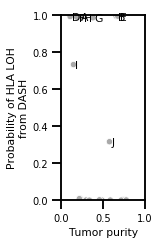

In [49]:
plt.figure(figsize=(1.5, 3.4))
sns.set_context('talk', font_scale=0.6)

x = np.arange(0, 1, 0.01)
ax = sns.scatterplot(x='purity', y='prediction_probability', data=merged_df3, color='darkgrey', size=2)
#plt.axhline(0.8, color='darkred', alpha=0.2)
#plt.axhline(0.2, color='darkred', alpha=0.2)
#plt.fill_between(x, 0.2, 0.8, color='darkred', alpha=0.2)
plt.ylim(0, 1)
plt.xlim(0, 1)

#plt.axvline(0.2, color='grey', alpha=0.2)
#plt.axvline(0.3, color='grey', alpha=0.2)
plt.legend().remove()
plt.ylabel('Probability of HLA LOH\nfrom DASH')
plt.xlabel('Tumor purity')


for dPCR, purity, patient_id in zip(merged_df3.purity, merged_df3.prediction_probability,
                                       merged_df3.Patient_ID):
    ax.annotate(patient_id, (dPCR+0.02, purity+-0.02))

#plt.savefig('/rnd/users/rpyke/data/00-DASH/figures/dPCR.probability_from_DASH_purity.pdf', bbox_inches='tight')

Save excel file

In [50]:
results_df_merged.head()

,Assay_Type,FAM_concentration,Patient,Round,Sample_Type,VIC_concentration,Ratio_concentration,Patient_ID
0,Kept\nAllele1,379.0,14.0,2,Normal,685.0,1.106569,J
1,Kept\nAllele1,363.0,14.0,2,Normal,684.0,1.061404,J
2,Kept\nAllele1,337.0,14.0,2,Normal,625.0,1.078400,J
3,Kept\nAllele1,1098.0,14.0,2,Tumor,492.0,4.463415,J
4,Kept\nAllele1,1063.0,14.0,2,Tumor,457.0,4.652079,J


In [51]:
lod_df_merged.head()

,Sample,Purity,Replicate,Assay_Type,FAM_concentration,VIC_concentration,Ratio_concentration
0,P40_R1,40,1,WT,362.0,551.0,1.313975
1,P40_R1,40,1,WT,330.0,477.0,1.383648
2,P40_R1,40,1,WT,333.0,503.0,1.324056
3,P60_R1,60,1,WT,367.0,483.0,1.519669
4,P60_R1,60,1,WT,358.0,466.0,1.536481


In [52]:
with pd.ExcelWriter('/rnd/users/rpyke/data/00-DASH/tables/Table_S5_dPCR_results.xlsx') as writer:  
    lod_df_merged[['Sample', 'Purity', 'Replicate', 'Assay_Type', 
                      'FAM_concentration', 'VIC_concentration']].to_excel(writer, sheet_name='Cell Line Dilutions',
                                                                    index=None)
    results_df_merged[['Patient_ID', 'Patient', 'Sample_Type', 'Assay_Type',
                      'FAM_concentration', 'VIC_concentration', 'Round']].to_excel(writer, sheet_name='Patients',
                                                                    index=None)

Confirmatory or novel?

In [53]:
sample_list = list(sample_selection.sample_name_tumor.unique())

In [54]:
train_data = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/training.all_data.csv')

In [55]:
train_data[train_data['sample'].isin(sample_list)]['sample'].unique()

array(['DNA_232313', 'DNA_NGT-LCA-1907001T', 'DNA_ILS50527PT6',
       'DNA_ILS38706PT3-DS1'], dtype=object)

In [56]:
len(train_data[train_data['sample'].isin(sample_list)]['sample'].unique())

4

In [57]:
len(merged_df3.sample_name_tumor.unique())

21

Copy number of RNASEP

In [58]:
results_df_merged[results_df_merged.Patient_ID == 'J']

,Assay_Type,FAM_concentration,Patient,Round,Sample_Type,VIC_concentration,Ratio_concentration,Patient_ID
0,Kept\nAllele1,379.0,14.0,2,Normal,685.0,1.106569,J
1,Kept\nAllele1,363.0,14.0,2,Normal,684.0,1.061404,J
2,Kept\nAllele1,337.0,14.0,2,Normal,625.0,1.078400,J
3,Kept\nAllele1,1098.0,14.0,2,Tumor,492.0,4.463415,J
4,Kept\nAllele1,1063.0,14.0,2,Tumor,457.0,4.652079,J
5,Kept\nAllele1,1001.0,14.0,2,Tumor,445.0,4.498876,J
12,Kept\nAllele2,367.0,14.0,2,Normal,701.0,1.047076,J
13,Kept\nAllele2,354.0,14.0,2,Normal,691.0,1.024602,J
14,Kept\nAllele2,334.0,14.0,2,Normal,633.0,1.055292,J
15,Kept\nAllele2,289.0,14.0,2,Tumor,541.0,1.068392,J


In [59]:
sample_selection[sample_selection['Sample #'] == 14]

,Sample #,sample_name_tumor,sample_name_normal,Patient,Patient_ID
8,14,DNA_45171,DNA_45177,14.0,J


In [60]:
readdata_df = pd.read_csv('/rnd/users/rpyke/data/00-DASH/manuscript_data_v2/pancancer.readdata.csv')

In [61]:
sample_id = 'DNA_45171'

In [62]:
cancer_home = list(readdata_df[readdata_df.sample_name_tumor == sample_id].cancer_home)[0]
sequenza_df = pd.read_csv(cancer_home + '/Sequenza/{0}_segments.txt'.format(sample_id), sep='\t')


In [63]:
# RNAse P: Chr 14; 65376206 - 65376498
sequenza_df[(sequenza_df.chromosome == '14')&(sequenza_df['start.pos']<65376498)&(sequenza_df['end.pos']>65376206)]

,chromosome,start.pos,end.pos,Bf,N.BAF,sd.BAF,depth.ratio,N.ratio,sd.ratio,CNt,A,B,LPP
105,14,20444012,107283150,0.445498,1054,0.060361,0.678722,2373244,0.129954,4,2,2,-12.479444
